# Student's Marks Prediction - SVR

* Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

* Importing Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [4]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


* Exploratory Data Analysis

In [5]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

Text(0.5, 1.0, 'Hours of Study v/s Marks Graph')

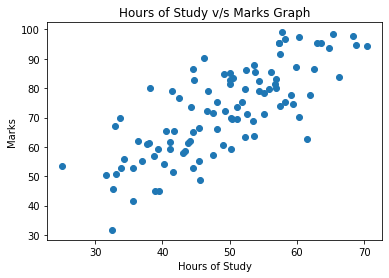

In [12]:
plt.scatter(df['Hours of Study'],df.Marks)
plt.xlabel('Hours of Study')
plt.ylabel("Marks")
plt.title('Hours of Study v/s Marks Graph')

In [13]:
df.corr()

,Hours of Study,Marks
Hours of Study,1.00000,0.76477
Marks,0.76477,1.00000


<AxesSubplot:>

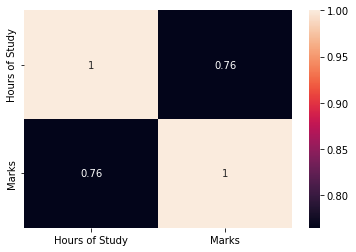

In [17]:
sns.heatmap(df.corr(),annot=True)